In [1]:
# Import Libs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# np.random.seed

# Generate Data
D = 100

N_train = 25
noise_train = np.random.normal(0,0.3,(D,N_train,1))
x_train = np.sort(np.random.uniform(0,1,(D,N_train,1)),axis=1)
t_train = np.sin(2*np.pi*x_train) + noise_train


N_test = 100
noise_test = np.random.normal(0,0.3,(D,N_test,1))
x_test = np.sort(np.random.uniform(0,1,(D,N_test,1)),axis=1)
t_test = np.sin(2*np.pi*x_test) + noise_test

In [3]:
ln_lambda = [2.6,-0.31,-2.4];
lambdas = np.exp(ln_lambda);

In [4]:
# Method for non-linear mapping
def gaussian_mapping(x,s):
    s = s**2
    N = len(x)
    phi = np.zeros((N,N))
    for i in range(N):
        phi[i,:] = np.exp(-1*np.power(x[i] - x.T,2)/(2*s)) 
    
    phi_t = np.hstack((np.ones((N,1)),phi))
    
    return phi_t


In [5]:
def train(x,t,lamb):
    return np.linalg.pinv(x.T@x+lamb*np.eye(len(x)+1))@x.T@t

def cost_function(f_x,t):
    cost = np.sum(np.power(f_x - t,2))
    return cost

def calculate(x,t,N,lambdas,plot=False):
    x_mesh = np.linspace(0,1,N).reshape(N,1)
    phi_mesh = gaussian_mapping(x_mesh,0.1)
    h_x = np.sin(2*np.pi*x_mesh)
    f_x = []

    y = np.zeros((len(lambdas), D, N,1))
    E = np.zeros((len(lambdas),1))

    for j in range(len(lambdas)):
        if plot:
            plt.figure()
        for i in range(D):
            phi = gaussian_mapping(x[i],0.1)
            w = train(phi,t[i],lambdas[j])
            y[j,i,:] = phi_mesh@w
            if plot:
                plt.plot(x_mesh,y[j,i,:],'r')
                plt.ylim([-2,2])
                plt.title('ln(lambda): ' + str(ln_lambda[j]))
        f_x.append(np.mean(y[j],axis=0))
        E[j] = np.sqrt(cost_function(f_x[j],t[j])/N)

    for j in range(len(lambdas)):
        
        if plot:
            plt.figure()
            plt.plot(x_mesh, h_x,'g')
            plt.plot(x_mesh,f_x[j],'r')
            plt.ylim([-1.5,1.5])
            plt.title('Average ln(lambda): ' + str(ln_lambda[j]))
    return f_x, h_x, E

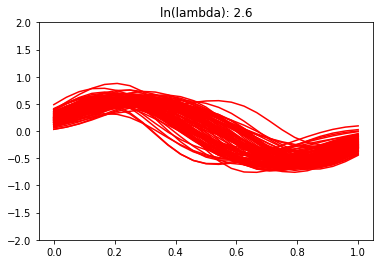

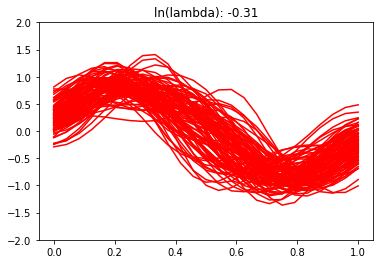

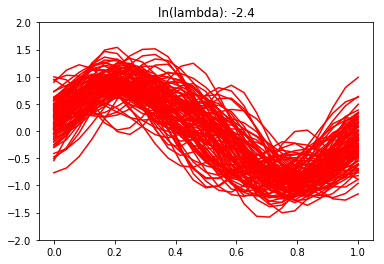

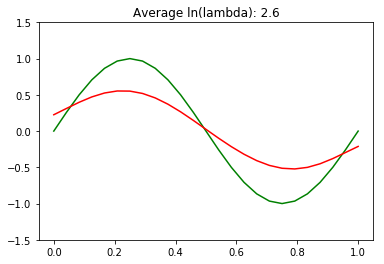

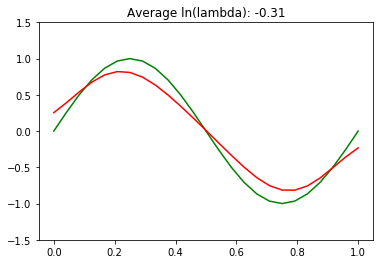

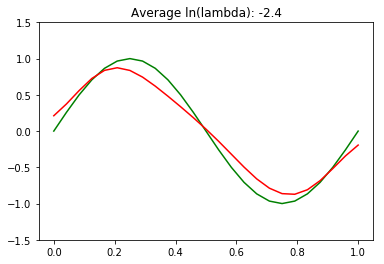

In [6]:
f_x = calculate(x_train,t_train,N_train,lambdas,True)

In [7]:
ln_lambdas = np.linspace(-2,2.6,5)
lambdas = np.exp(ln_lambdas)
f_x,h_x,E = calculate(x_train,t_train,N_train,lambdas,False)

In [8]:
f_x_test,h_x_test,E_test = calculate(x_test,t_test,N_test,lambdas,False)

In [9]:
# Calculate Bias
bias_sq = np.zeros((len(lambdas),1))
for i in range(len(lambdas)):
    bias_sq[i] = np.power(np.mean(f_x[i]-h_x),2) 
    
# Calculate Variance
variance = np.zeros((len(lambdas),1))
for i in range(len(lambdas)):
    variance[i] = np.mean(np.mean(np.power(t_train-f_x[i],2),axis=0))

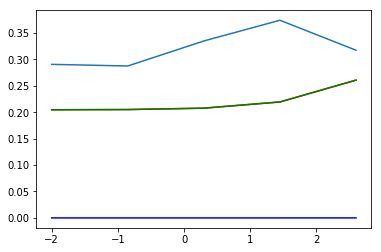

In [20]:
plt.plot(ln_lambdas,bias_sq,'b')
plt.plot(ln_lambdas,variance,'r')
plt.plot(ln_lambdas,bias_sq+variance,'g')
plt.plot(ln_lambdas,E_test)